# Setup

In [1]:
!pip install emoji transformers datasets seqeval 

     |████████████████████████████████| 175 kB 5.2 MB/s 
     |████████████████████████████████| 3.8 MB 42.4 MB/s 
     |████████████████████████████████| 325 kB 33.3 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 6.6 MB 38.3 MB/s 
     |████████████████████████████████| 895 kB 41.3 MB/s 
     |████████████████████████████████| 596 kB 46.6 MB/s 
     |████████████████████████████████| 67 kB 5.4 MB/s 
     |████████████████████████████████| 212 kB 54.4 MB/s 
     |████████████████████████████████| 1.1 MB 43.1 MB/s 
     |████████████████████████████████| 136 kB 51.4 MB/s 
     |████████████████████████████████| 127 kB 52.0 MB/s 
     |████████████████████████████████| 94 kB 3.4 MB/s 
     |████████████████████████████████| 271 kB 50.6 MB/s 
     |████████████████████████████████| 144 kB 48.8 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=7f9fd5026e37bd7ba40d3553a5d83232135419d9183e93f3edb61

In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from datasets import load_dataset

# Irrelevant

## [vinai/bertweet-base](https://huggingface.co/vinai/bertweet-base)

### data

In [5]:
irrelevant_dataset = load_dataset('csv', data_files={'train': '/content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Tweets/1_irrelevant_train.csv', 'test': '/content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Tweets/1_irrelevant_test.csv'})

Using custom data configuration default-501c10a56946a66e


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-501c10a56946a66e/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [6]:
irrelevant_dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'label', 'text'],
        num_rows: 453
    })
    test: Dataset({
        features: ['Unnamed: 0', 'label', 'text'],
        num_rows: 195
    })
})

In [7]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-base")

Downloading:   0%|          | 0.00/558 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/824k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [8]:
def preprocess_function(examples):
    return tokenizer(examples["text"], padding=True, truncation=True)

In [9]:
tokenized_irrelevant = irrelevant_dataset.map(preprocess_function, batched=True)
print(tokenized_irrelevant)

columns_to_return = ['input_ids', 'label', 'attention_mask']
tokenized_irrelevant.set_format(type='torch', columns=columns_to_return)
print(tokenized_irrelevant)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'label', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 453
    })
    test: Dataset({
        features: ['Unnamed: 0', 'label', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 195
    })
})
DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'label', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 453
    })
    test: Dataset({
        features: ['Unnamed: 0', 'label', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 195
    })
})


In [10]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [11]:
data_collator

DataCollatorWithPadding(tokenizer=PreTrainedTokenizer(name_or_path='vinai/bertweet-base', vocab_size=64000, model_max_len=128, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}), padding=True, max_length=None, pad_to_multiple_of=None, return_tensors='pt')

### fine-tune

In [12]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained("vinai/bertweet-base", num_labels=2)

Downloading:   0%|          | 0.00/517M [00:00<?, ?B/s]

Some weights of the model checkpoint at vinai/bertweet-base were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'roberta.pooler.dense.weight', 'lm_head.decoder.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/bertweet-base and are newly initialized: 

In [13]:
import numpy as np
from datasets import load_metric

training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=10,
    weight_decay=0.01
)

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_irrelevant["train"],
    eval_dataset=tokenized_irrelevant["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

In [14]:
trainer.evaluate()

The following columns in the evaluation set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text, Unnamed: 0. If text, Unnamed: 0 are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 195
  Batch size = 32


{'eval_accuracy': 0.8461538461538461,
 'eval_loss': 0.6519823670387268,
 'eval_runtime': 3.8241,
 'eval_samples_per_second': 50.992,
 'eval_steps_per_second': 1.83}

In [15]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text, Unnamed: 0. If text, Unnamed: 0 are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 453
  Num Epochs = 10
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 150


Step,Training Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=150, training_loss=0.182496706644694, metrics={'train_runtime': 192.6112, 'train_samples_per_second': 23.519, 'train_steps_per_second': 0.779, 'total_flos': 239775365860200.0, 'train_loss': 0.182496706644694, 'epoch': 10.0})

In [16]:
trainer.evaluate()

The following columns in the evaluation set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text, Unnamed: 0. If text, Unnamed: 0 are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 195
  Batch size = 32


{'epoch': 10.0,
 'eval_accuracy': 0.9179487179487179,
 'eval_loss': 0.29270488023757935,
 'eval_runtime': 3.7317,
 'eval_samples_per_second': 52.255,
 'eval_steps_per_second': 1.876}

In [17]:
trainer.save_model('irrelevant.model')

Saving model checkpoint to irrelevant.model
Configuration saved in irrelevant.model/config.json
Model weights saved in irrelevant.model/pytorch_model.bin
tokenizer config file saved in irrelevant.model/tokenizer_config.json
Special tokens file saved in irrelevant.model/special_tokens_map.json
added tokens file saved in irrelevant.model/added_tokens.json


In [20]:
trainer.save_model('/content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Social_Sensing_for_Detecting_Air_Pollution/Model/Sentiment0_Irrelevant')

Saving model checkpoint to /content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Social_Sensing_for_Detecting_Air_Pollution/Model/Sentiment0_Irrelevant
Configuration saved in /content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Social_Sensing_for_Detecting_Air_Pollution/Model/Sentiment0_Irrelevant/config.json
Model weights saved in /content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Social_Sensing_for_Detecting_Air_Pollution/Model/Sentiment0_Irrelevant/pytorch_model.bin
tokenizer config file saved in /content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Social_Sensing_for_Detecting_Air_Pollution/Model/Sentiment0_Irrelevant/tokenizer_config.json
Special tokens file saved in /content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Social_Sensing_for_Detecting_Air_Pollution/Model/Sentiment0_Irrelevant/special_tokens_map.json
added tokens file saved in /content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Social_Sensing_for_Detecting_Air_Pollution/Model/Sentiment0_Irrelevant/added_tokens.json


### predict

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('./irrelevant.model/')
model = AutoModelForSequenceClassification.from_pretrained('./irrelevant.model/', num_labels=2)

loading file ./irrelevant.model/vocab.txt
loading file ./irrelevant.model/bpe.codes
loading file ./irrelevant.model/added_tokens.json
loading file ./irrelevant.model/special_tokens_map.json
loading file ./irrelevant.model/tokenizer_config.json
Adding <mask> to the vocabulary
loading configuration file ./irrelevant.model/config.json
Model config RobertaConfig {
  "_name_or_path": "./irrelevant.model/",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 130,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classificati

In [ ]:
from transformers import pipeline

generator = pipeline(task="text-classification", model=model, tokenizer=tokenizer)

In [ ]:
generator(['Hills Ablaze Above Manchester as U.K. Wildfire Rages for 4th Day https://t.co/vArOufXTet https://t.co/vArOufXTet', '@JBBuczek Quite happy to take a little off you. Raging wildfire on Saddleworth Moor near Manchester. They seem to think some heavy rain is the only thing now to put it out. But whatever the weather enjoy your day John.'])

Disabling tokenizer parallelism, we're using DataLoader multithreading already


[{'label': 'LABEL_1', 'score': 0.9867493510246277},
 {'label': 'LABEL_1', 'score': 0.9869828224182129}]

# Sentiment

## Comparison

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Tweets/test_sentiment.csv')

In [ ]:
c_tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
c_model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

f_tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")
f_model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")

In [ ]:
c_sentiment_classifier = pipeline('text-classification', model=c_model, tokenizer=c_tokenizer)
c_sentiment_dic = {'LABEL_0': 'Negative', 'LABEL_1': 'Neutral', 'LABEL_2': 'Positive'}
c_sentiment_result = {'Negative': 0, 'Neutral': 0, 'Positive': 0}

f_sentiment_classifier = pipeline('text-classification', model=f_model, tokenizer=f_tokenizer)
f_sentiment_dic = {'NEG': 'Negative', 'NEU': 'Neutral', 'POS': 'Positive'}
f_sentiment_result = {'Negative': 0, 'Neutral': 0, 'Positive': 0}

In [ ]:
sentiment_models = pd.DataFrame({'Text':[], 'C_Label':[], 'F_Label':[]})

count = 0

for i in data['text']:
  count += 1
  if count % 100 == 0:
    print(count)
  try:
    c = c_sentiment_dic[c_sentiment_classifier(i)[0]['label']]
    f = f_sentiment_dic[f_sentiment_classifier(i)[0]['label']]

    sentiment_models = sentiment_models.append({'Text': i, 'C_Label': c, 'F_Label': f}, ignore_index=True)

    c_sentiment_result[c] += 1
    f_sentiment_result[f] += 1
  except:
    pass

100
200
300


Token indices sequence length is longer than the specified maximum sequence length for this model (167 > 128). Running this sequence through the model will result in indexing errors


400
500
600
700
800
900
1000


In [ ]:
import operator

print('cardiffnlp/twitter-roberta-base-sentiment:   ' + str(sorted(c_sentiment_result.items(), key=operator.itemgetter(1), reverse=True)))
print('\nfiniteautomata/bertweet-base-sentiment-analysis:   ' + str(sorted(f_sentiment_result.items(), key=operator.itemgetter(1), reverse=True)))

print(sum(v for v in c_sentiment_result.values()))
print(sum(v for v in f_sentiment_result.values()))

cardiffnlp/twitter-roberta-base-sentiment:   [('Neutral', 674), ('Negative', 283), ('Positive', 89)]

finiteautomata/bertweet-base-sentiment-analysis:   [('Neutral', 673), ('Negative', 281), ('Positive', 92)]
1046
1046


In [ ]:
sentiment_models

,Text,C_Label,F_Label
0,Oldham Council leader Sean Fielding is being i...,Neutral,Neutral
1,Love is in the air: heart-shaped cloud over Sa...,Positive,Positive
2,Home from work just in time to enjoy the sunse...,Positive,Positive
3,Saddleworth air cadets have touched down after...,Neutral,Neutral
4,"Wow, it's out of this world what the Saddlewor...",Positive,Positive
...,...,...,...
1041,Half the skyline filled with smoke from the cu...,Negative,Negative
1042,The #wildfire has ruined someone's #sunshine t...,Negative,Negative
1043,BREAKING: Huge wildfire rages in Yorkshire as ...,Negative,Negative
1044,Firefighters say they expect to spend all day ...,Neutral,Neutral


In [ ]:
sentiment_models.to_csv('sentiment_models.csv')

## [cardiffnlp/twitter-roberta-base-sentiment](https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment)

### data

In [21]:
emotion_dataset = load_dataset('csv', data_files={'train': '/content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Tweets/1_sentiment_train.csv', 'test': '/content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Tweets/1_sentiment_test.csv'})

Using custom data configuration default-bc293680a08cab11


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-bc293680a08cab11/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [22]:
emotion_dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'label', 'text'],
        num_rows: 383
    })
    test: Dataset({
        features: ['Unnamed: 0', 'label', 'text'],
        num_rows: 165
    })
})

In [23]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")


def tokenize_function(examples):
    return tokenizer(examples["text"], padding=True, truncation=True)


tokenized_emotion = emotion_dataset.map(tokenize_function, batched=True)

columns_to_return = ['input_ids', 'label', 'attention_mask']
tokenized_emotion.set_format(type='torch', columns=columns_to_return)
print(tokenized_emotion)

Could not locate the tokenizer configuration file, will try to use the model config instead.
https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpr3zhcnwf


Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

storing https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/7dd97280b5338fb674b5372829a05a1aaaa76f9f2fa71c36199f2ce1ee1104a0.4c7ca95b4fd82b8bbe94fde253f5f82e5a4eedefe6f86f6fa79efc903d6cfe60
creating metadata file for /root/.cache/huggingface/transformers/7dd97280b5338fb674b5372829a05a1aaaa76f9f2fa71c36199f2ce1ee1104a0.4c7ca95b4fd82b8bbe94fde253f5f82e5a4eedefe6f86f6fa79efc903d6cfe60
loading configuration file https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/7dd97280b5338fb674b5372829a05a1aaaa76f9f2fa71c36199f2ce1ee1104a0.4c7ca95b4fd82b8bbe94fde253f5f82e5a4eedefe6f86f6fa79efc903d6cfe60
Model config RobertaConfig {
  "_name_or_path": "cardiffnlp/twitter-roberta-base-sentiment",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classif

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

storing https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/vocab.json in cache at /root/.cache/huggingface/transformers/089d0f043cfdb86b4f4d79238552b1dcd5b791d4be7c48f27bd7323bdbb7c599.647b4548b6d9ea817e82e7a9231a320231a1c9ea24053cc9e758f3fe68216f05
creating metadata file for /root/.cache/huggingface/transformers/089d0f043cfdb86b4f4d79238552b1dcd5b791d4be7c48f27bd7323bdbb7c599.647b4548b6d9ea817e82e7a9231a320231a1c9ea24053cc9e758f3fe68216f05
https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/merges.txt not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpjrfyows1


Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

storing https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/merges.txt in cache at /root/.cache/huggingface/transformers/45449f1b6476a9fe84f9eade7f45745cdea8af6b3735f760d8bb0f4b71adf57f.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
creating metadata file for /root/.cache/huggingface/transformers/45449f1b6476a9fe84f9eade7f45745cdea8af6b3735f760d8bb0f4b71adf57f.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/special_tokens_map.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpsku6e9sr


Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

storing https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/special_tokens_map.json in cache at /root/.cache/huggingface/transformers/5d7665586d1ae04ace347574fee8f19ad7875acf296e81464f2fb0bb70c0c404.0dc5b1041f62041ebbd23b1297f2f573769d5c97d8b7c28180ec86b8f6185aa8
creating metadata file for /root/.cache/huggingface/transformers/5d7665586d1ae04ace347574fee8f19ad7875acf296e81464f2fb0bb70c0c404.0dc5b1041f62041ebbd23b1297f2f573769d5c97d8b7c28180ec86b8f6185aa8
loading file https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/vocab.json from cache at /root/.cache/huggingface/transformers/089d0f043cfdb86b4f4d79238552b1dcd5b791d4be7c48f27bd7323bdbb7c599.647b4548b6d9ea817e82e7a9231a320231a1c9ea24053cc9e758f3fe68216f05
loading file https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/merges.txt from cache at /root/.cache/huggingface/transformers/45449f1b6476a9fe84f9eade7f45745cdea8af6b3735f760d8bb0f4b71adf57f.5d12962c5ee6

  0%|          | 0/1 [00:00<?, ?ba/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


  0%|          | 0/1 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'label', 'text', 'input_ids', 'attention_mask'],
        num_rows: 383
    })
    test: Dataset({
        features: ['Unnamed: 0', 'label', 'text', 'input_ids', 'attention_mask'],
        num_rows: 165
    })
})


In [24]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment", num_labels=3)

loading configuration file https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/7dd97280b5338fb674b5372829a05a1aaaa76f9f2fa71c36199f2ce1ee1104a0.4c7ca95b4fd82b8bbe94fde253f5f82e5a4eedefe6f86f6fa79efc903d6cfe60
Model config RobertaConfig {
  "_name_or_path": "cardiffnlp/twitter-roberta-base-sentiment",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_head

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

storing https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/11065c9c045391e7a6b2bb2451b862074866aeddabaece3ef767540b48247a1c.a8b67614ee564f9fefd65a3a42566038ccf3e86668cb888d8ae05ec670696ba7
creating metadata file for /root/.cache/huggingface/transformers/11065c9c045391e7a6b2bb2451b862074866aeddabaece3ef767540b48247a1c.a8b67614ee564f9fefd65a3a42566038ccf3e86668cb888d8ae05ec670696ba7
loading weights file https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/11065c9c045391e7a6b2bb2451b862074866aeddabaece3ef767540b48247a1c.a8b67614ee564f9fefd65a3a42566038ccf3e86668cb888d8ae05ec670696ba7
All model checkpoint weights were used when initializing RobertaForSequenceClassification.

All the weights of RobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-

In [25]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [26]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

### fine-tune

In [27]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import numpy as np
from datasets import load_metric

training_args = TrainingArguments(
    output_dir="./result1",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=10,
    weight_decay=0.01
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_emotion["train"],
    eval_dataset=tokenized_emotion["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [28]:
trainer.evaluate()

The following columns in the evaluation set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text, Unnamed: 0. If text, Unnamed: 0 are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 165
  Batch size = 32


{'eval_accuracy': 0.7272727272727273,
 'eval_loss': 0.5497018694877625,
 'eval_runtime': 3.0279,
 'eval_samples_per_second': 54.493,
 'eval_steps_per_second': 1.982}

In [29]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text, Unnamed: 0. If text, Unnamed: 0 are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 383
  Num Epochs = 10
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 120


Step,Training Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=120, training_loss=0.1173505942026774, metrics={'train_runtime': 184.0951, 'train_samples_per_second': 20.804, 'train_steps_per_second': 0.652, 'total_flos': 228312557086320.0, 'train_loss': 0.1173505942026774, 'epoch': 10.0})

In [30]:
trainer.evaluate()

The following columns in the evaluation set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text, Unnamed: 0. If text, Unnamed: 0 are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 165
  Batch size = 32


{'epoch': 10.0,
 'eval_accuracy': 0.896969696969697,
 'eval_loss': 0.5563254952430725,
 'eval_runtime': 3.0105,
 'eval_samples_per_second': 54.809,
 'eval_steps_per_second': 1.993}

In [31]:
trainer.save_model('/content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Social_Sensing_for_Detecting_Air_Pollution/Model/Sentiment1_cardiffnlp')

Saving model checkpoint to /content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Social_Sensing_for_Detecting_Air_Pollution/Model/Sentiment1_cardiffnlp
Configuration saved in /content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Social_Sensing_for_Detecting_Air_Pollution/Model/Sentiment1_cardiffnlp/config.json
Model weights saved in /content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Social_Sensing_for_Detecting_Air_Pollution/Model/Sentiment1_cardiffnlp/pytorch_model.bin
tokenizer config file saved in /content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Social_Sensing_for_Detecting_Air_Pollution/Model/Sentiment1_cardiffnlp/tokenizer_config.json
Special tokens file saved in /content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Social_Sensing_for_Detecting_Air_Pollution/Model/Sentiment1_cardiffnlp/special_tokens_map.json


### predict

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('./cardiffnlp.model/')
model = AutoModelForSequenceClassification.from_pretrained('./cardiffnlp.model/', num_labels=3)

Didn't find file ./cardiffnlp.model/added_tokens.json. We won't load it.
loading file ./cardiffnlp.model/vocab.json
loading file ./cardiffnlp.model/merges.txt
loading file ./cardiffnlp.model/tokenizer.json
loading file None
loading file ./cardiffnlp.model/special_tokens_map.json
loading file ./cardiffnlp.model/tokenizer_config.json
loading configuration file ./cardiffnlp.model/config.json
Model config RobertaConfig {
  "_name_or_path": "./cardiffnlp.model/",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_posi

In [ ]:
from transformers import pipeline
generator = pipeline(task="text-classification", model=model, tokenizer=tokenizer)

In [ ]:
# sen = {'negative': 0, 'neutral': 1, 'positive': 2}

generator(['I can actually smell smoke and see it in the air in Salford. Is this from the Saddleworth moors fire?'])

[{'label': 'LABEL_0', 'score': 0.9926793575286865}]

## [finiteautomata/bertweet-base-sentiment-analysis](https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis)

### data

In [32]:
emotion_dataset = load_dataset('csv', data_files={'train': '/content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Tweets/1_sentiment_train.csv', 'test': '/content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Tweets/1_sentiment_test.csv'})

Using custom data configuration default-bc293680a08cab11
Reusing dataset csv (/root/.cache/huggingface/datasets/csv/default-bc293680a08cab11/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)


  0%|          | 0/2 [00:00<?, ?it/s]

In [33]:
emotion_dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'label', 'text'],
        num_rows: 383
    })
    test: Dataset({
        features: ['Unnamed: 0', 'label', 'text'],
        num_rows: 165
    })
})

In [34]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")


def tokenize_function(examples):
    return tokenizer(examples["text"], padding=True, truncation=True)


tokenized_emotion = emotion_dataset.map(tokenize_function, batched=True)

columns_to_return = ['input_ids', 'label', 'attention_mask']
tokenized_emotion.set_format(type='torch', columns=columns_to_return)
print(tokenized_emotion)

https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/tokenizer_config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpvumi7qku


Downloading:   0%|          | 0.00/295 [00:00<?, ?B/s]

storing https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/tokenizer_config.json in cache at /root/.cache/huggingface/transformers/61374b71c02fdfd2929a3cdce24c242049e036624e15e18461a3a70cfc35e939.c260b44e952f7f2a825aac395f2ebbed4ac9553800d1e320af246e81a548f37c
creating metadata file for /root/.cache/huggingface/transformers/61374b71c02fdfd2929a3cdce24c242049e036624e15e18461a3a70cfc35e939.c260b44e952f7f2a825aac395f2ebbed4ac9553800d1e320af246e81a548f37c
https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpr7e8t97l


Downloading:   0%|          | 0.00/890 [00:00<?, ?B/s]

storing https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/cb09766f7ba60b5f7a1bb640617b24f1499c4a6f3ab160c4a0ac171e3a377c68.008dca06003188334001a96363da79ced4944abc68d94a2f1e0db786dc5aa08b
creating metadata file for /root/.cache/huggingface/transformers/cb09766f7ba60b5f7a1bb640617b24f1499c4a6f3ab160c4a0ac171e3a377c68.008dca06003188334001a96363da79ced4944abc68d94a2f1e0db786dc5aa08b
loading configuration file https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/cb09766f7ba60b5f7a1bb640617b24f1499c4a6f3ab160c4a0ac171e3a377c68.008dca06003188334001a96363da79ced4944abc68d94a2f1e0db786dc5aa08b
Model config RobertaConfig {
  "_name_or_path": "finiteautomata/bertweet-base-sentiment-analysis",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_

Downloading:   0%|          | 0.00/824k [00:00<?, ?B/s]

storing https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/vocab.txt in cache at /root/.cache/huggingface/transformers/973dbacfdf4c488622f01d1a226089e9e3dba130a0c3c11c2e36d49466fa40a8.f8a4dfe5c3c45a26f9df849d732decb191dc0c05ab270799695430332d143982
creating metadata file for /root/.cache/huggingface/transformers/973dbacfdf4c488622f01d1a226089e9e3dba130a0c3c11c2e36d49466fa40a8.f8a4dfe5c3c45a26f9df849d732decb191dc0c05ab270799695430332d143982
https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/bpe.codes not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp2ay09552


Downloading:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

storing https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/bpe.codes in cache at /root/.cache/huggingface/transformers/0e474c44ff353f3b378fb140e7e6d4431df4ec6142e8b38d584c0dbc5afc3521.75877d86011e5d5d46614d3a21757b705e9d20ed45a019805d25159b4837b0a4
creating metadata file for /root/.cache/huggingface/transformers/0e474c44ff353f3b378fb140e7e6d4431df4ec6142e8b38d584c0dbc5afc3521.75877d86011e5d5d46614d3a21757b705e9d20ed45a019805d25159b4837b0a4
https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/added_tokens.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp_jp62wsw


Downloading:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

storing https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/added_tokens.json in cache at /root/.cache/huggingface/transformers/fe46927817477a58ec2aa92ef52f8ee6fc9e824d054f4aa6a3c129724dc9c9b7.c1e7052e39d2135302ec27455f6db22e1520e6539942ff60a849c7f83f8ec6dc
creating metadata file for /root/.cache/huggingface/transformers/fe46927817477a58ec2aa92ef52f8ee6fc9e824d054f4aa6a3c129724dc9c9b7.c1e7052e39d2135302ec27455f6db22e1520e6539942ff60a849c7f83f8ec6dc
https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/special_tokens_map.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp407bjeof


Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

storing https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/special_tokens_map.json in cache at /root/.cache/huggingface/transformers/9413ac0bed76140860deffa0c5a29ee4da7d49a3810da1b4b51b27f790bc9255.0dc5b1041f62041ebbd23b1297f2f573769d5c97d8b7c28180ec86b8f6185aa8
creating metadata file for /root/.cache/huggingface/transformers/9413ac0bed76140860deffa0c5a29ee4da7d49a3810da1b4b51b27f790bc9255.0dc5b1041f62041ebbd23b1297f2f573769d5c97d8b7c28180ec86b8f6185aa8
loading file https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/973dbacfdf4c488622f01d1a226089e9e3dba130a0c3c11c2e36d49466fa40a8.f8a4dfe5c3c45a26f9df849d732decb191dc0c05ab270799695430332d143982
loading file https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/bpe.codes from cache at /root/.cache/huggingface/transformers/0e474c44ff353f3b378fb140e7e6d4431df4ec6142e8b38d584c0dbc5afc3

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'label', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 383
    })
    test: Dataset({
        features: ['Unnamed: 0', 'label', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 165
    })
})


In [35]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis", num_labels=3)

loading configuration file https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/cb09766f7ba60b5f7a1bb640617b24f1499c4a6f3ab160c4a0ac171e3a377c68.008dca06003188334001a96363da79ced4944abc68d94a2f1e0db786dc5aa08b
Model config RobertaConfig {
  "_name_or_path": "finiteautomata/bertweet-base-sentiment-analysis",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "NEG",
    "1": "NEU",
    "2": "POS"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "NEG": 0,
    "NEU": 1,
    "POS": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 130,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "n

Downloading:   0%|          | 0.00/515M [00:00<?, ?B/s]

storing https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/2e4719cf8d097772eb75070b88cbc56f1d3b1392fffc5f75032a389ef21d1847.16366ca1277caccb15200478349503b3336a1420ac26d44fc16763354f5a2cae
creating metadata file for /root/.cache/huggingface/transformers/2e4719cf8d097772eb75070b88cbc56f1d3b1392fffc5f75032a389ef21d1847.16366ca1277caccb15200478349503b3336a1420ac26d44fc16763354f5a2cae
loading weights file https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/2e4719cf8d097772eb75070b88cbc56f1d3b1392fffc5f75032a389ef21d1847.16366ca1277caccb15200478349503b3336a1420ac26d44fc16763354f5a2cae
All model checkpoint weights were used when initializing RobertaForSequenceClassification.

All the weights of RobertaForSequenceClassification were initialized from the model checkpoint at finiteautomata/bertw

In [36]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [37]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

### fine-tune

In [38]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import numpy as np
from datasets import load_metric

training_args = TrainingArguments(
    output_dir="./result2",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=10,
    weight_decay=0.01
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_emotion["train"],
    eval_dataset=tokenized_emotion["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [39]:
trainer.evaluate()

The following columns in the evaluation set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text, Unnamed: 0. If text, Unnamed: 0 are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 165
  Batch size = 32


{'eval_accuracy': 0.7151515151515152,
 'eval_loss': 0.69721919298172,
 'eval_runtime': 2.6366,
 'eval_samples_per_second': 62.581,
 'eval_steps_per_second': 2.276}

In [40]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text, Unnamed: 0. If text, Unnamed: 0 are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 383
  Num Epochs = 10
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 120


Step,Training Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=120, training_loss=0.1361617088317871, metrics={'train_runtime': 152.3026, 'train_samples_per_second': 25.147, 'train_steps_per_second': 0.788, 'total_flos': 185011899707880.0, 'train_loss': 0.1361617088317871, 'epoch': 10.0})

In [41]:
trainer.evaluate()

The following columns in the evaluation set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text, Unnamed: 0. If text, Unnamed: 0 are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 165
  Batch size = 32


{'epoch': 10.0,
 'eval_accuracy': 0.8787878787878788,
 'eval_loss': 0.575385570526123,
 'eval_runtime': 2.5932,
 'eval_samples_per_second': 63.627,
 'eval_steps_per_second': 2.314}

In [42]:
trainer.save_model('/content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Social_Sensing_for_Detecting_Air_Pollution/Model/Sentiment2_finiteautomata')

Saving model checkpoint to /content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Social_Sensing_for_Detecting_Air_Pollution/Model/Sentiment2_finiteautomata
Configuration saved in /content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Social_Sensing_for_Detecting_Air_Pollution/Model/Sentiment2_finiteautomata/config.json
Model weights saved in /content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Social_Sensing_for_Detecting_Air_Pollution/Model/Sentiment2_finiteautomata/pytorch_model.bin
tokenizer config file saved in /content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Social_Sensing_for_Detecting_Air_Pollution/Model/Sentiment2_finiteautomata/tokenizer_config.json
Special tokens file saved in /content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Social_Sensing_for_Detecting_Air_Pollution/Model/Sentiment2_finiteautomata/special_tokens_map.json
added tokens file saved in /content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Social_Sensing_for_Detecting_Air_Pollution/Model/Sentiment2_finiteautomata/ad

### predict

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('./finiteautomata.model/')
model = AutoModelForSequenceClassification.from_pretrained('./finiteautomata.model/', num_labels=3)

loading file ./finiteautomata.model/vocab.txt
loading file ./finiteautomata.model/bpe.codes
loading file ./finiteautomata.model/added_tokens.json
loading file ./finiteautomata.model/special_tokens_map.json
loading file ./finiteautomata.model/tokenizer_config.json
Adding <mask> to the vocabulary
loading configuration file ./finiteautomata.model/config.json
Model config RobertaConfig {
  "_name_or_path": "./finiteautomata.model/",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "NEG",
    "1": "NEU",
    "2": "POS"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "NEG": 0,
    "NEU": 1,
    "POS": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 130,
  "model_type": "roberta",
  "n

In [ ]:
from transformers import pipeline
generator = pipeline(task="text-classification", model=model, tokenizer=tokenizer)

In [ ]:
# sen = {'negative': 0, 'neutral': 1, 'positive': 2}

generator(['Living in a place with increasingly worse wildfires, the idea of how airtankers could be made better kind of appeals to me even if I’m not sure if this proposal is practical it does look COOL'])

[{'label': 'NEG', 'score': 0.8271980285644531}]

# Emotion

## tweet_2

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Tweets/tweet_2.csv')

In [ ]:
print(data.shape)
print(data)

(1047, 4)
                id  ...                                               text
0     1.055740e+18  ...  Oldham Council leader Sean Fielding is being i...
1     1.051560e+18  ...  Love is in the air: heart-shaped cloud over Sa...
2     1.050120e+18  ...  Home from work just in time to enjoy the sunse...
3     1.041590e+18  ...  Saddleworth air cadets have touched down after...
4     1.039560e+18  ...  Wow, it's out of this world what the Saddlewor...
...            ...  ...                                                ...
1042  1.011310e+18  ...  Half the skyline filled with smoke from the cu...
1043  1.011290e+18  ...  The #wildfire has ruined someone's #sunshine t...
1044  1.011250e+18  ...  BREAKING: Huge wildfire rages in Yorkshire as ...
1045  1.011250e+18  ...  Firefighters say they expect to spend all day ...
1046  1.011240e+18  ...  The wildfire broke out in Saddleworth Moorland...

[1047 rows x 4 columns]


## [finiteautomata/bertweet-base-emotion-analysis](https://huggingface.co/finiteautomata/bertweet-base-emotion-analysis)

### data

In [ ]:
emotion_dataset = load_dataset('csv', data_files={'train': '/content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Tweets/emotion_train.csv', 'test': '/content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Tweets/emotion_test.csv'})

Using custom data configuration default-d87736d6e39cd790


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-d87736d6e39cd790/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
emotion_dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 124
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 54
    })
})

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-emotion-analysis")


def tokenize_function(examples):
    return tokenizer(examples["text"], padding=True, truncation=True)


tokenized_emotion = emotion_dataset.map(tokenize_function, batched=True)

columns_to_return = ['input_ids', 'label', 'attention_mask']
tokenized_emotion.set_format(type='torch', columns=columns_to_return)
print(tokenized_emotion)

Downloading:   0%|          | 0.00/295 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/999 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/824k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 124
    })
    test: Dataset({
        features: ['label', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 54
    })
})


In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/bertweet-base-emotion-analysis", num_labels=7)

Downloading:   0%|          | 0.00/515M [00:00<?, ?B/s]

In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

Downloading:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

### fine-tune

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import numpy as np
from datasets import load_metric

training_args = TrainingArguments(
    output_dir="./result2",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=10,
    weight_decay=0.01
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_emotion["train"],
    eval_dataset=tokenized_emotion["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.evaluate()

The following columns in the evaluation set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 54
  Batch size = 32


{'eval_accuracy': 0.4444444444444444,
 'eval_loss': 2.6661481857299805,
 'eval_runtime': 0.8214,
 'eval_samples_per_second': 65.745,
 'eval_steps_per_second': 2.435}

In [ ]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 124
  Num Epochs = 10
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 40


Step,Training Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=40, training_loss=0.8310812950134278, metrics={'train_runtime': 39.9236, 'train_samples_per_second': 31.059, 'train_steps_per_second': 1.002, 'total_flos': 57989813154000.0, 'train_loss': 0.8310812950134278, 'epoch': 10.0})

In [ ]:
trainer.evaluate()

The following columns in the evaluation set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 54
  Batch size = 32


{'epoch': 10.0,
 'eval_accuracy': 0.5185185185185185,
 'eval_loss': 1.416071891784668,
 'eval_runtime': 0.6301,
 'eval_samples_per_second': 85.696,
 'eval_steps_per_second': 3.174}

In [ ]:
trainer.save_model('finiteautomata.model')

Saving model checkpoint to finiteautomata.model
Configuration saved in finiteautomata.model/config.json
Model weights saved in finiteautomata.model/pytorch_model.bin
tokenizer config file saved in finiteautomata.model/tokenizer_config.json
Special tokens file saved in finiteautomata.model/special_tokens_map.json
added tokens file saved in finiteautomata.model/added_tokens.json


### predict

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('./finiteautomata.model/')
model = AutoModelForSequenceClassification.from_pretrained('./finiteautomata.model/', num_labels=7)

loading file ./finiteautomata.model/vocab.txt
loading file ./finiteautomata.model/bpe.codes
loading file ./finiteautomata.model/added_tokens.json
loading file ./finiteautomata.model/special_tokens_map.json
loading file ./finiteautomata.model/tokenizer_config.json
Adding <mask> to the vocabulary
loading configuration file ./finiteautomata.model/config.json
Model config RobertaConfig {
  "_name_or_path": "./finiteautomata.model/",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "others",
    "1": "joy",
    "2": "sadness",
    "3": "anger",
    "4": "surprise",
    "5": "disgust",
    "6": "fear"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "anger": 3,
    "disgust": 5,
    "fear": 6,
    "j

In [ ]:
from transformers import pipeline
generator = pipeline(task="text-classification", model=model, tokenizer=tokenizer)

In [ ]:
# emo = {'others': 0, 'joy': 1, 'sadness': 2, 'anger': 3, 'surprise': 4, 'disgust': 5, 'fear': 6}

generator(['I can actually smell smoke and see it in the air in Salford. Is this from the Saddleworth moors fire?'])

[{'label': 'surprise', 'score': 0.9696947336196899}]

## [j-hartmann/emotion-english-distilroberta-base](https://huggingface.co/j-hartmann/emotion-english-distilroberta-base)

### data

In [ ]:
emotion_dataset = load_dataset('csv', data_files={'train': '/content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Tweets/emotion_train_2.csv', 'test': '/content/drive/MyDrive/Riza_Jingxuan/Year_3_Project/Tweets/emotion_test_2.csv'})

Using custom data configuration default-4bd5986189ae2ac3


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-4bd5986189ae2ac3/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
emotion_dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 124
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 54
    })
})

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("j-hartmann/emotion-english-distilroberta-base")


def tokenize_function(examples):
    return tokenizer(examples["text"], padding=True, truncation=True)


tokenized_emotion = emotion_dataset.map(tokenize_function, batched=True)

columns_to_return = ['input_ids', 'label', 'attention_mask']
tokenized_emotion.set_format(type='torch', columns=columns_to_return)
print(tokenized_emotion)

https://huggingface.co/j-hartmann/emotion-english-distilroberta-base/resolve/main/tokenizer_config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp6ctfyzj4


Downloading:   0%|          | 0.00/294 [00:00<?, ?B/s]

storing https://huggingface.co/j-hartmann/emotion-english-distilroberta-base/resolve/main/tokenizer_config.json in cache at /root/.cache/huggingface/transformers/9c99692835590373539a08d1c7b54fa0fc25353c3ccbbc2dc3ff8b52dd509682.2ddf1b356c06d617f67df8d99c4d892198669aefe01b6afbe8c04f1b3d86abd0
creating metadata file for /root/.cache/huggingface/transformers/9c99692835590373539a08d1c7b54fa0fc25353c3ccbbc2dc3ff8b52dd509682.2ddf1b356c06d617f67df8d99c4d892198669aefe01b6afbe8c04f1b3d86abd0
https://huggingface.co/j-hartmann/emotion-english-distilroberta-base/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpiwoj96pu


Downloading:   0%|          | 0.00/0.98k [00:00<?, ?B/s]

storing https://huggingface.co/j-hartmann/emotion-english-distilroberta-base/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/cf0d76ef122b326527bd6a56a127784dd513117bdfde0df5b011c9751bce8fd6.512111953428ded6703782e47e2f67b1c438267f7f4a7c0f19bc1850651a93b4
creating metadata file for /root/.cache/huggingface/transformers/cf0d76ef122b326527bd6a56a127784dd513117bdfde0df5b011c9751bce8fd6.512111953428ded6703782e47e2f67b1c438267f7f4a7c0f19bc1850651a93b4
loading configuration file https://huggingface.co/j-hartmann/emotion-english-distilroberta-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/cf0d76ef122b326527bd6a56a127784dd513117bdfde0df5b011c9751bce8fd6.512111953428ded6703782e47e2f67b1c438267f7f4a7c0f19bc1850651a93b4
Model config RobertaConfig {
  "_name_or_path": "j-hartmann/emotion-english-distilroberta-base",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

storing https://huggingface.co/j-hartmann/emotion-english-distilroberta-base/resolve/main/vocab.json in cache at /root/.cache/huggingface/transformers/c81beb2fff962084ecafd1e59723b32f7417ab26febe34b32d1ee518220f03d9.bfdcc444ff249bca1a95ca170ec350b442f81804d7df3a95a2252217574121d7
creating metadata file for /root/.cache/huggingface/transformers/c81beb2fff962084ecafd1e59723b32f7417ab26febe34b32d1ee518220f03d9.bfdcc444ff249bca1a95ca170ec350b442f81804d7df3a95a2252217574121d7
https://huggingface.co/j-hartmann/emotion-english-distilroberta-base/resolve/main/merges.txt not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmplrpdv1fx


Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

storing https://huggingface.co/j-hartmann/emotion-english-distilroberta-base/resolve/main/merges.txt in cache at /root/.cache/huggingface/transformers/7b46710061831241eddbee3a6ba33d6b739ffbf9d1b651c365a41f47893c48a1.f5b91da9e34259b8f4d88dbc97c740667a0e8430b96314460cdb04e86d4fc435
creating metadata file for /root/.cache/huggingface/transformers/7b46710061831241eddbee3a6ba33d6b739ffbf9d1b651c365a41f47893c48a1.f5b91da9e34259b8f4d88dbc97c740667a0e8430b96314460cdb04e86d4fc435
https://huggingface.co/j-hartmann/emotion-english-distilroberta-base/resolve/main/tokenizer.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmptj1shsxg


Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

storing https://huggingface.co/j-hartmann/emotion-english-distilroberta-base/resolve/main/tokenizer.json in cache at /root/.cache/huggingface/transformers/589f720addb5adfe0557ff3bce0e1ca6cf0f4d8def9b217b1bc57ba0eb8cab56.5e13b866659a58116cc29672daac5672bd3a95646be51fa222d6021a538cfc56
creating metadata file for /root/.cache/huggingface/transformers/589f720addb5adfe0557ff3bce0e1ca6cf0f4d8def9b217b1bc57ba0eb8cab56.5e13b866659a58116cc29672daac5672bd3a95646be51fa222d6021a538cfc56
https://huggingface.co/j-hartmann/emotion-english-distilroberta-base/resolve/main/special_tokens_map.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp8k1gpaau


Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

storing https://huggingface.co/j-hartmann/emotion-english-distilroberta-base/resolve/main/special_tokens_map.json in cache at /root/.cache/huggingface/transformers/61b9bf7f141e1e3d5530baf82b66d64c0e318871cfdb385a2a3b448943f24fd3.a11ebb04664c067c8fe5ef8f8068b0f721263414a26058692f7b2e4ba2a1b342
creating metadata file for /root/.cache/huggingface/transformers/61b9bf7f141e1e3d5530baf82b66d64c0e318871cfdb385a2a3b448943f24fd3.a11ebb04664c067c8fe5ef8f8068b0f721263414a26058692f7b2e4ba2a1b342
loading file https://huggingface.co/j-hartmann/emotion-english-distilroberta-base/resolve/main/vocab.json from cache at /root/.cache/huggingface/transformers/c81beb2fff962084ecafd1e59723b32f7417ab26febe34b32d1ee518220f03d9.bfdcc444ff249bca1a95ca170ec350b442f81804d7df3a95a2252217574121d7
loading file https://huggingface.co/j-hartmann/emotion-english-distilroberta-base/resolve/main/merges.txt from cache at /root/.cache/huggingface/transformers/7b46710061831241eddbee3a6ba33d6b739ffbf9d1b651c365a41f47893c48a1.

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'text', 'input_ids', 'attention_mask'],
        num_rows: 124
    })
    test: Dataset({
        features: ['label', 'text', 'input_ids', 'attention_mask'],
        num_rows: 54
    })
})


In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("j-hartmann/emotion-english-distilroberta-base", num_labels=7)

loading configuration file https://huggingface.co/j-hartmann/emotion-english-distilroberta-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/cf0d76ef122b326527bd6a56a127784dd513117bdfde0df5b011c9751bce8fd6.512111953428ded6703782e47e2f67b1c438267f7f4a7c0f19bc1850651a93b4
Model config RobertaConfig {
  "_name_or_path": "j-hartmann/emotion-english-distilroberta-base",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "anger",
    "1": "disgust",
    "2": "fear",
    "3": "joy",
    "4": "neutral",
    "5": "sadness",
    "6": "surprise"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "anger": 0,
    "disgust": 1,
    "fear": 2,
    "joy": 3,
    "neutral": 4,
    "s

Downloading:   0%|          | 0.00/313M [00:00<?, ?B/s]

storing https://huggingface.co/j-hartmann/emotion-english-distilroberta-base/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/dfe486a57eaa37babb1c8da1d0542143e39b66ce9e13cb5ac082a901d36b9e3c.ff670fb8c15564f094f6b848371dbdbade7105b49b47bfef9d402c8443664bd9
creating metadata file for /root/.cache/huggingface/transformers/dfe486a57eaa37babb1c8da1d0542143e39b66ce9e13cb5ac082a901d36b9e3c.ff670fb8c15564f094f6b848371dbdbade7105b49b47bfef9d402c8443664bd9
loading weights file https://huggingface.co/j-hartmann/emotion-english-distilroberta-base/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/dfe486a57eaa37babb1c8da1d0542143e39b66ce9e13cb5ac082a901d36b9e3c.ff670fb8c15564f094f6b848371dbdbade7105b49b47bfef9d402c8443664bd9
All model checkpoint weights were used when initializing RobertaForSequenceClassification.

All the weights of RobertaForSequenceClassification were initialized from the model checkpoint at j-hartmann/emotion-engli

In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

### fine-tune

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import numpy as np
from datasets import load_metric

training_args = TrainingArguments(
    output_dir="./result3",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=10,
    weight_decay=0.01
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_emotion["train"],
    eval_dataset=tokenized_emotion["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
trainer.evaluate()

The following columns in the evaluation set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 54
  Batch size = 32


{'eval_accuracy': 0.09259259259259259,
 'eval_loss': 4.350549221038818,
 'eval_runtime': 0.509,
 'eval_samples_per_second': 106.096,
 'eval_steps_per_second': 3.929}

In [ ]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 124
  Num Epochs = 10
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 40


Step,Training Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=40, training_loss=1.7243064880371093, metrics={'train_runtime': 22.7632, 'train_samples_per_second': 54.474, 'train_steps_per_second': 1.757, 'total_flos': 34009897319520.0, 'train_loss': 1.7243064880371093, 'epoch': 10.0})

In [ ]:
trainer.evaluate()

The following columns in the evaluation set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 54
  Batch size = 32


{'epoch': 10.0,
 'eval_accuracy': 0.3888888888888889,
 'eval_loss': 1.6933985948562622,
 'eval_runtime': 0.4547,
 'eval_samples_per_second': 118.752,
 'eval_steps_per_second': 4.398}

In [ ]:
trainer.save_model('j-hartmann.model')

Saving model checkpoint to j-hartmann.model
Configuration saved in j-hartmann.model/config.json
Model weights saved in j-hartmann.model/pytorch_model.bin
tokenizer config file saved in j-hartmann.model/tokenizer_config.json
Special tokens file saved in j-hartmann.model/special_tokens_map.json


### predict

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('./j-hartmann.model/')
model = AutoModelForSequenceClassification.from_pretrained('./j-hartmann.model/', num_labels=7)

Didn't find file ./j-hartmann.model/added_tokens.json. We won't load it.
loading file ./j-hartmann.model/vocab.json
loading file ./j-hartmann.model/merges.txt
loading file ./j-hartmann.model/tokenizer.json
loading file None
loading file ./j-hartmann.model/special_tokens_map.json
loading file ./j-hartmann.model/tokenizer_config.json
loading configuration file ./j-hartmann.model/config.json
Model config RobertaConfig {
  "_name_or_path": "./j-hartmann.model/",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "anger",
    "1": "disgust",
    "2": "fear",
    "3": "joy",
    "4": "neutral",
    "5": "sadness",
    "6": "surprise"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "anger": 0,
    "dis

In [ ]:
from transformers import pipeline
generator = pipeline(task="text-classification", model=model, tokenizer=tokenizer)

In [ ]:
# emo2 = {'anger': 0, 'disgust': 1, 'fear': 2, 'joy': 3, 'neutral': 4, 'sadness': 5, 'surprise': 6}

generator(['Unprecedented wildfire raging near Manchester https://t.co/RWXQz5QiCZ https://t.co/ew5Ox194Ne'])

[{'label': 'neutral', 'score': 0.5867632627487183}]

## Comparison

In [ ]:
j_tokenizer = AutoTokenizer.from_pretrained("j-hartmann/emotion-english-distilroberta-base")
j_model = AutoModelForSequenceClassification.from_pretrained("j-hartmann/emotion-english-distilroberta-base")

b_tokenizer = AutoTokenizer.from_pretrained("bhadresh-savani/distilbert-base-uncased-emotion")
b_model = AutoModelForSequenceClassification.from_pretrained("bhadresh-savani/distilbert-base-uncased-emotion")

c_tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")
c_model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")

f_tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-emotion-analysis")
f_model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/bertweet-base-emotion-analysis")

Downloading:   0%|          | 0.00/294 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.98k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/313M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/291 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/768 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/779 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/295 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/999 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/824k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/515M [00:00<?, ?B/s]

In [ ]:
j_emotion_classifier = pipeline('text-classification', model=j_model, tokenizer=j_tokenizer)
b_emotion_classifier = pipeline('text-classification', model=b_model, tokenizer=b_tokenizer)
c_emotion_classifier = pipeline('text-classification', model=c_model, tokenizer=c_tokenizer)
f_emotion_classifier = pipeline('text-classification', model=f_model, tokenizer=f_tokenizer)

c_emotion_dic = {'LABEL_0': 'joy', 'LABEL_1': 'optimism', 'LABEL_2': 'anger', 'LABEL_3':'sadness'}

j_emotion_result = {'joy': 0, 'sadness': 0, 'anger': 0, 'surprise': 0, 'fear': 0, 'disgust': 0, 'neutral': 0}
f_emotion_result = {'joy': 0, 'sadness': 0, 'anger': 0, 'surprise': 0, 'fear': 0, 'disgust': 0, 'others': 0}
b_emotion_result = {'joy': 0, 'sadness': 0, 'anger': 0, 'surprise': 0, 'fear': 0, 'love': 0}
c_emotion_result = {'joy': 0, 'sadness': 0, 'anger': 0, 'optimism': 0}

In [ ]:
emotion_models = pd.DataFrame({'Text':[], 'J_Label':[], 'B_Label':[], 'C_Label':[], 'F_Label':[]})

count = 0

for i in data['text']:
  count += 1
  if count % 100 == 0:
    print(count)
  try:
    j = j_emotion_classifier(i)[0]['label']
    b = b_emotion_classifier(i)[0]['label']
    c = c_emotion_dic[c_emotion_classifier(i)[0]['label']]
    f = f_emotion_classifier(i)[0]['label']

    emotion_models = emotion_models.append({'Text': i, 'J_Label': j, 'B_Label': b, 'C_Label': c, 'F_Label': f}, ignore_index=True)

    j_emotion_result[j] += 1
    b_emotion_result[b] += 1
    c_emotion_result[c] += 1
    f_emotion_result[f] += 1
  except:
    pass

100


In [ ]:
import operator

print('j-hartmann/emotion-english-distilroberta-base:   ' + str(sorted(j_emotion_result.items(), key=operator.itemgetter(1), reverse=True)))
print('\nbhadresh-savani/distilbert-base-uncased-emotion:   ' + str(sorted(b_emotion_result.items(), key=operator.itemgetter(1), reverse=True)))
print('\ncardiffnlp/twitter-roberta-base-emotion:   ' + str(sorted(c_emotion_result.items(), key=operator.itemgetter(1), reverse=True)))
print('\nfiniteautomata/bertweet-base-emotion-analysis:   ' + str(sorted(f_emotion_result.items(), key=operator.itemgetter(1), reverse=True)))

j-hartmann/emotion-english-distilroberta-base:   [('fear', 98), ('anger', 25), ('joy', 17), ('disgust', 17), ('surprise', 8), ('neutral', 7), ('sadness', 6)]

bhadresh-savani/distilbert-base-uncased-emotion:   [('joy', 64), ('fear', 48), ('anger', 44), ('sadness', 19), ('surprise', 2), ('love', 1)]

cardiffnlp/twitter-roberta-base-emotion:   [('sadness', 95), ('joy', 33), ('optimism', 31), ('anger', 19)]

finiteautomata/bertweet-base-emotion-analysis:   [('others', 72), ('fear', 56), ('joy', 21), ('surprise', 10), ('sadness', 8), ('disgust', 8), ('anger', 3)]


In [ ]:
print(sum(v for v in j_emotion_result.values()))
print(sum(v for v in b_emotion_result.values()))
print(sum(v for v in c_emotion_result.values()))
print(sum(v for v in f_emotion_result.values()))

178
178
178
178


In [ ]:
emotion_models

,Text,J_Label,B_Label,C_Label,F_Label
0,So the Saddleworth wildfire is worst on the mi...,disgust,sadness,joy,disgust
1,Earth is burning .. and the profit makers ... ...,anger,joy,joy,anger
2,You fucking morons - going to Saddleworth moor...,disgust,anger,joy,anger
3,It's mad how the whole of Manchester smells li...,anger,anger,joy,others
4,Thinking of everyone in Stalybridge or close t...,fear,fear,sadness,sadness
...,...,...,...,...,...
173,Unprecedented' wildfire prompts home evacuatio...,fear,fear,sadness,fear
174,What a shot || Wildfire sweeps the moors near ...,fear,joy,optimism,others
175,Wildfires are a pretty rare occurrence in the ...,fear,fear,sadness,fear
176,"Shockingly, the air in #Southport is acrid wit...",fear,fear,sadness,fear


In [ ]:
emotion_models.to_csv('emotion_models.csv')

## Exploration

### [j-hartmann/emotion-english-distilroberta-base](https://huggingface.co/j-hartmann/emotion-english-distilroberta-base)

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("j-hartmann/emotion-english-distilroberta-base")

model = AutoModelForSequenceClassification.from_pretrained("j-hartmann/emotion-english-distilroberta-base")

Downloading:   0%|          | 0.00/294 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.98k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/313M [00:00<?, ?B/s]

In [ ]:
emotion_classifier = pipeline('text-classification', model=model, tokenizer=tokenizer)
emotion_result = {'neutral': 0, 'joy': 0, 'sadness': 0, 'anger': 0, 'surprise': 0, 'disgust': 0, 'fear': 0}

for i in data['text']:
  try:
    emotion_result[emotion_classifier(i)[0]['label']] += 1
  except:
    pass

print(emotion_result)

{'neutral': 61, 'joy': 34, 'sadness': 21, 'anger': 96, 'surprise': 12, 'disgust': 29, 'fear': 794}


### [bhadresh-savani/distilbert-base-uncased-emotion](https://huggingface.co/bhadresh-savani/distilbert-base-uncased-emotion)

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("bhadresh-savani/distilbert-base-uncased-emotion")

model = AutoModelForSequenceClassification.from_pretrained("bhadresh-savani/distilbert-base-uncased-emotion")

Downloading:   0%|          | 0.00/291 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/768 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

In [ ]:
emotion_classifier = pipeline('text-classification', model=model, tokenizer=tokenizer)
emotion_result = {'joy': 0, 'sadness': 0, 'anger': 0, 'surprise': 0, 'love': 0, 'fear': 0}

for i in data['text']:
  try:
    emotion_result[emotion_classifier(i)[0]['label']] += 1
  except:
    pass

print(emotion_result)

{'joy': 215, 'sadness': 51, 'anger': 403, 'surprise': 9, 'love': 9, 'fear': 360}


### [cardiffnlp/twitter-roberta-base-emotion](https://huggingface.co/cardiffnlp/twitter-roberta-base-emotion)

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")

model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")

Downloading:   0%|          | 0.00/779 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

In [ ]:
emotion_classifier = pipeline('text-classification', model=model, tokenizer=tokenizer)
emotion_dic = {'LABEL_0': 'joy', 'LABEL_1': 'optimism', 'LABEL_2': 'anger', 'LABEL_3':'sadness'}
emotion_result = {'joy': 0, 'optimism': 0, 'anger': 0, 'sadness': 0}

for i in data['text']:
  try:
    emotion_result[emotion_dic[emotion_classifier(i)[0]['label']]] += 1
  except:
    pass

print(emotion_result)

{'joy': 216, 'optimism': 147, 'anger': 107, 'sadness': 577}


### [finiteautomata/bertweet-base-emotion-analysis](https://huggingface.co/finiteautomata/bertweet-base-emotion-analysis?text=Saddleworth+Moor+residents+suffering+from+smog%2C+sore+eyes+and+nosebleeds...+https%3A%2F%2Ft.co%2FJ3xyW0Jdes+via+%40YouTube)

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-emotion-analysis")

model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/bertweet-base-emotion-analysis")

Downloading:   0%|          | 0.00/295 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/999 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/824k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/515M [00:00<?, ?B/s]

In [ ]:
emotion_classifier = pipeline('text-classification', model=model, tokenizer=tokenizer)
emotion_result = {'others': 0, 'joy': 0, 'sadness': 0, 'anger': 0, 'surprise': 0, 'disgust': 0, 'fear': 0}

for i in data['text']:
  try:
    emotion_result[emotion_classifier(i)[0]['label']] += 1
  except:
    pass

print(emotion_result)

{'others': 117, 'joy': 4, 'sadness': 3, 'anger': 1, 'surprise': 2, 'disgust': 4, 'fear': 91}


# Test

## Sentiment
[finiteautomata/bertweet-base-sentiment-analysis](https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis?text=Saddleworth+Moor+residents+suffering+from+smog%2C+sore+eyes+and+nosebleeds...+https%3A%2F%2Ft.co%2FJ3xyW0Jdes+via+%40YouTube)

In [ ]:
sentiment_tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")

sentiment_model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")

Downloading:   0%|          | 0.00/295 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/890 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/824k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/515M [00:00<?, ?B/s]

In [ ]:
sentiment_classifier = pipeline('text-classification', model=sentiment_model, tokenizer=sentiment_tokenizer)

In [ ]:
sentiment_result = {'NEG': 0, 'NEU': 0, 'POS': 0}

for i in data['text']:
  try:
    sentiment_result[sentiment_classifier(i)[0]['label']] += 1
  except:
    pass

print(sentiment_result)

{'NEG': 105, 'NEU': 107, 'POS': 10}


## Detail Emotion

[joeddav/distilbert-base-uncased-go-emotions-student](https://huggingface.co/joeddav/distilbert-base-uncased-go-emotions-student?text=I+feel+lucky+to+be+here.)

In [ ]:
checkpoint = "joeddav/distilbert-base-uncased-go-emotions-student"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [ ]:
raw_inputs = list(data['text'])
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
# print(inputs)

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**inputs)

In [ ]:
print(outputs.logits.shape)
# print(outputs.logits)

torch.Size([222, 28])


In [ ]:
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
# print(predictions)

In [ ]:
label = model.config.id2label
print(label)

{0: 'admiration', 1: 'amusement', 2: 'anger', 3: 'annoyance', 4: 'approval', 5: 'caring', 6: 'confusion', 7: 'curiosity', 8: 'desire', 9: 'disappointment', 10: 'disapproval', 11: 'disgust', 12: 'embarrassment', 13: 'excitement', 14: 'fear', 15: 'gratitude', 16: 'grief', 17: 'joy', 18: 'love', 19: 'nervousness', 20: 'optimism', 21: 'pride', 22: 'realization', 23: 'relief', 24: 'remorse', 25: 'sadness', 26: 'surprise', 27: 'neutral'}


In [ ]:
predictions.shape

torch.Size([222, 28])

In [ ]:
all = [0] * predictions.shape[1]
                                 
for i in range(predictions.shape[0]):
  print(data['text'][i])
  temp = {label[k]:float(predictions[i][k]) for k in range(predictions.shape[1])}
  print(sorted(temp.items(), key=lambda x:x[1], reverse=True), end='\n\n\n')

  for j in range(predictions.shape[1]):
    all[j] += float(predictions[i][j])

result = {label[k]:all[k] for k in range(predictions.shape[1])}
print(sorted(result.items(), key=lambda x:x[1], reverse=True))

On now: The Future of Air @bluedotfestival 

Our @SarahLMander joins the panel to discuss what summer wildfires – like the ones seen recently on Saddleworth Moor and Winter Hill – do to the air we breathe, in the context of #climatechange #policy #renewableenergy &amp; #localaction https://t.co/4ZZxdTzGi6
[('caring', 0.17867383360862732), ('curiosity', 0.11477826535701752), ('realization', 0.08066680282354355), ('excitement', 0.06985550373792648), ('approval', 0.05289246141910553), ('desire', 0.048951610922813416), ('remorse', 0.04724789038300514), ('surprise', 0.03321715444326401), ('optimism', 0.03040916472673416), ('pride', 0.029960235580801964), ('disapproval', 0.027853423729538918), ('admiration', 0.027585092931985855), ('amusement', 0.026878060773015022), ('neutral', 0.023270558565855026), ('relief', 0.02293931320309639), ('confusion', 0.02232951670885086), ('joy', 0.0177826639264822), ('nervousness', 0.017208067700266838), ('grief', 0.016675177961587906), ('gratitude', 0.0163470

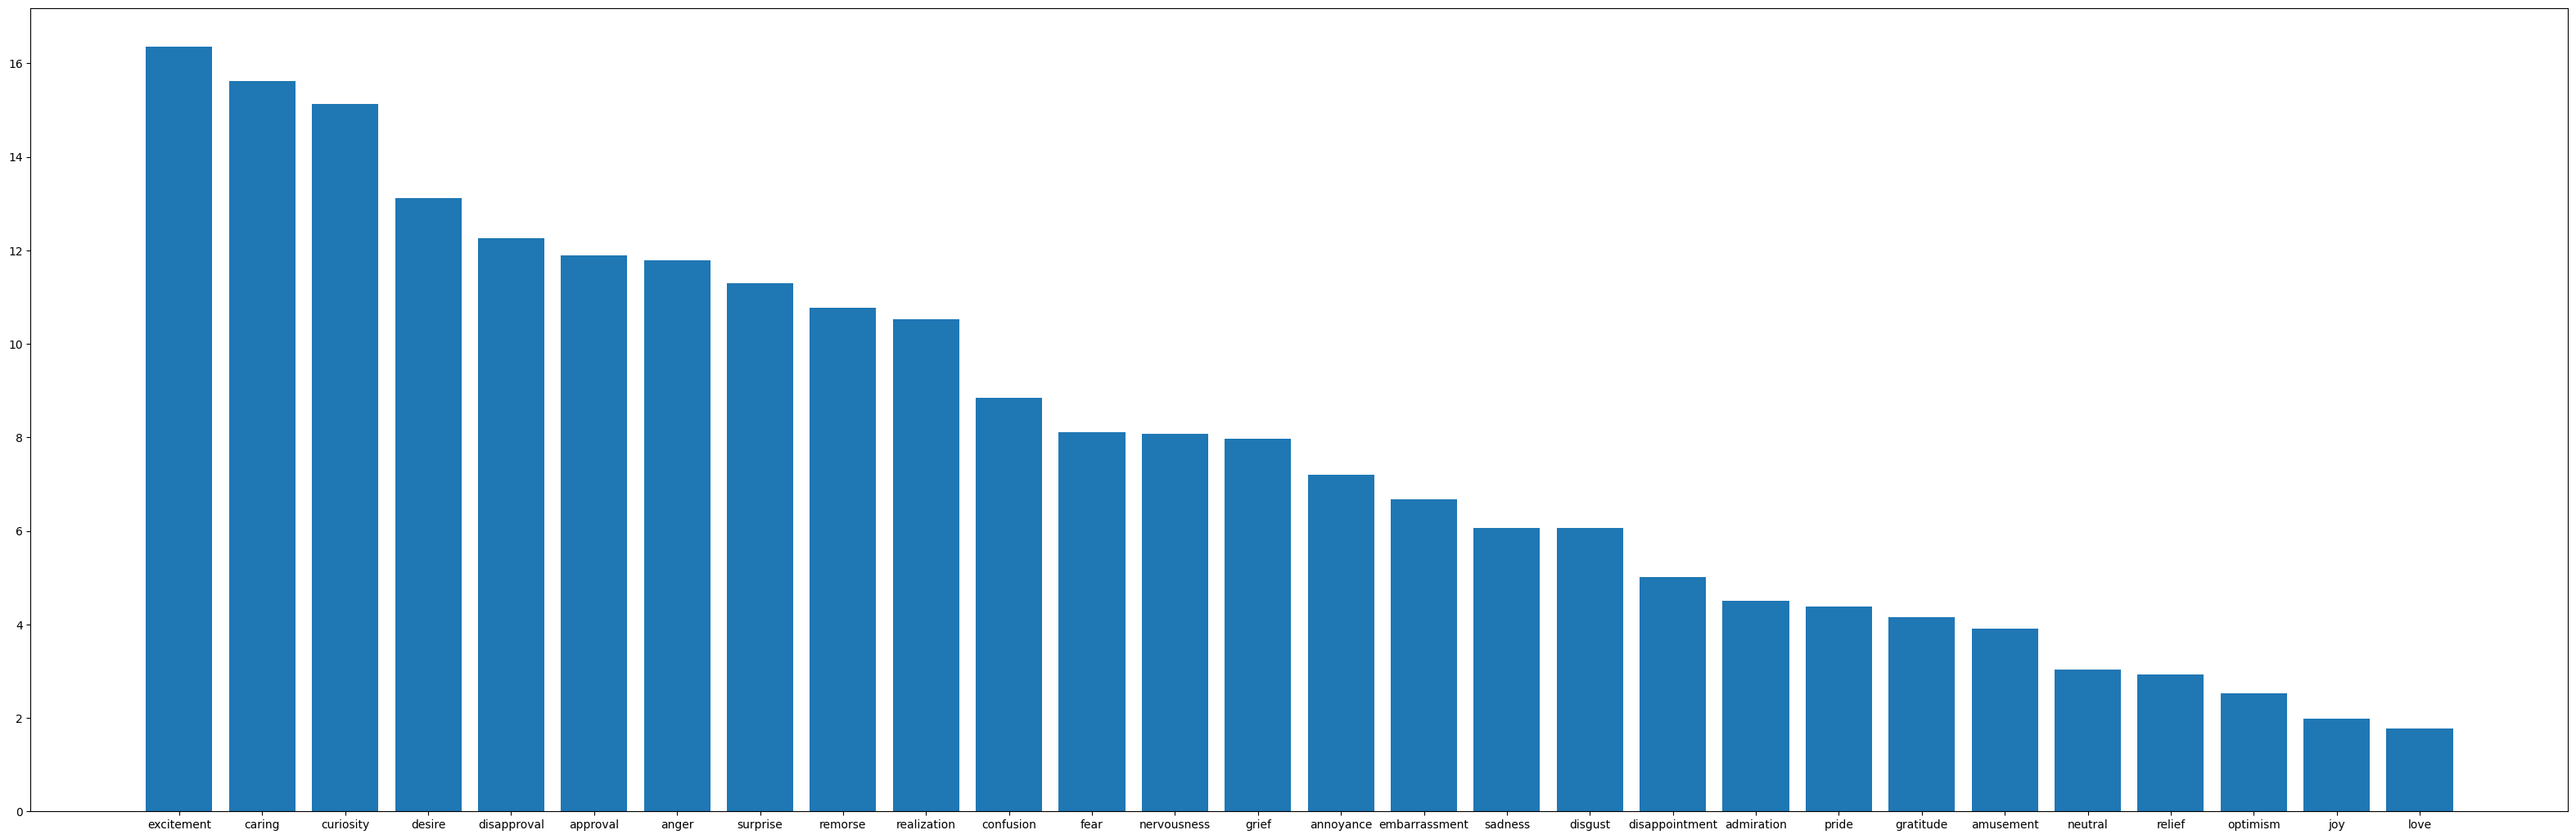

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(40, 13), dpi=100)

sort = sorted(result.items(), key=lambda x:x[1], reverse=True)

x = [i[0] for i in sort]
y = [i[1] for i in sort]

plt.bar(x, y)
plt.show()